### Q5

In [14]:
import kagglehub
from os import listdir
import pandas as pd


path = kagglehub.dataset_download("abdmental01/heart-disease-dataset")
path = f"{path}/{[f for f in listdir(path) if '.csv' in f][0]}"
data = pd.read_csv(path)

In [15]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.00,233.0,True,lv hypertrophy,150.00,False,2.300,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.00,286.0,False,lv hypertrophy,108.00,True,1.500,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.00,229.0,False,lv hypertrophy,129.00,True,2.600,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.00,250.0,False,normal,187.00,False,3.500,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.00,204.0,False,lv hypertrophy,172.00,False,1.400,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,916,54,Female,VA Long Beach,asymptomatic,127.00,333.0,True,st-t abnormality,154.00,False,0.000,flat,0.0,normal,1
915,917,62,Male,VA Long Beach,typical angina,143.06,139.0,False,st-t abnormality,119.94,True,2.042,flat,0.0,reversable defect,0
916,918,55,Male,VA Long Beach,asymptomatic,122.00,223.0,True,st-t abnormality,100.00,False,0.000,flat,1.0,fixed defect,2
917,919,58,Male,VA Long Beach,asymptomatic,150.81,385.0,True,lv hypertrophy,110.63,True,2.181,flat,0.0,reversable defect,0


In [16]:
data = data.drop(['id', 'dataset'], axis=1)

In [17]:
data = pd.get_dummies(data)

In [18]:
# change to binary classification
data['num'] = data['num'].map(lambda x: x != 0)

In [19]:
data

,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.00,233.0,True,150.00,False,2.300,0.0,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False
1,67,160.00,286.0,False,108.00,True,1.500,3.0,True,False,True,True,False,False,False,True,False,False,False,True,False,False,True,False
2,67,120.00,229.0,False,129.00,True,2.600,2.0,True,False,True,True,False,False,False,True,False,False,False,True,False,False,False,True
3,37,130.00,250.0,False,187.00,False,3.500,0.0,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False
4,41,130.00,204.0,False,172.00,False,1.400,0.0,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,54,127.00,333.0,True,154.00,False,0.000,0.0,True,True,False,True,False,False,False,False,False,True,False,True,False,False,True,False
915,62,143.06,139.0,False,119.94,True,2.042,0.0,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True
916,55,122.00,223.0,True,100.00,False,0.000,1.0,True,False,True,True,False,False,False,False,False,True,False,True,False,True,False,False
917,58,150.81,385.0,True,110.63,True,2.181,0.0,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,True


In [20]:
X = data.drop('num', axis=1)
y = data[['num']]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC()
]

names = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'Gradient Boosting',
    'SVM'
]

confs = []
accuracies = []
precisions = []
recalls = []
f1s = []
auc_rocs = []
for i, model in enumerate(models):
    print(f'Fitting {names[i]}')
    model.fit(X_train, y_train.to_numpy().ravel())
    y_pred = model.predict(X_test)
    
    confs.append(confusion_matrix(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))
    auc_rocs.append(roc_auc_score(y_test, y_pred))


Fitting Logistic Regression
Fitting Decision Tree
Fitting Random Forest
Fitting Gradient Boosting
Fitting SVM


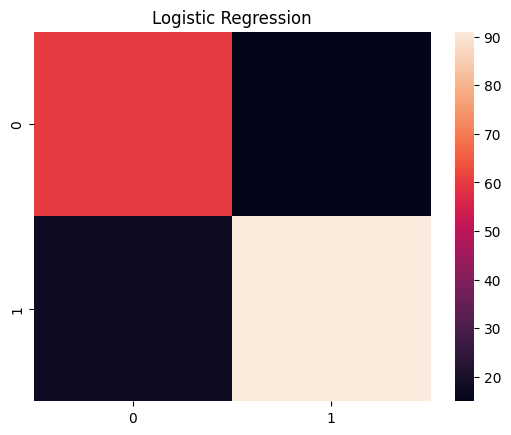

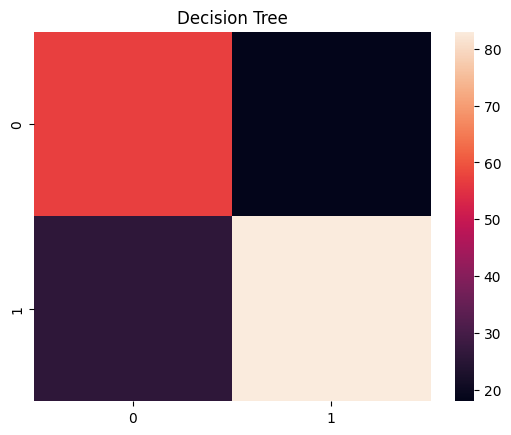

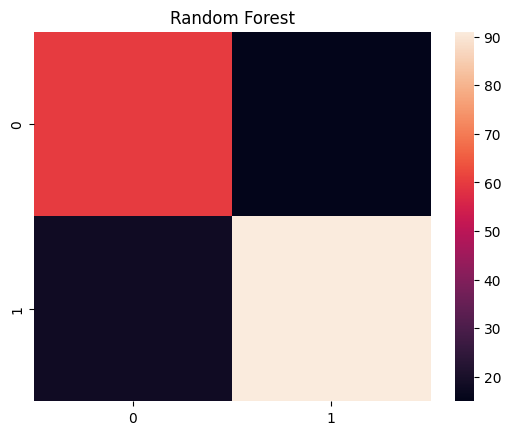

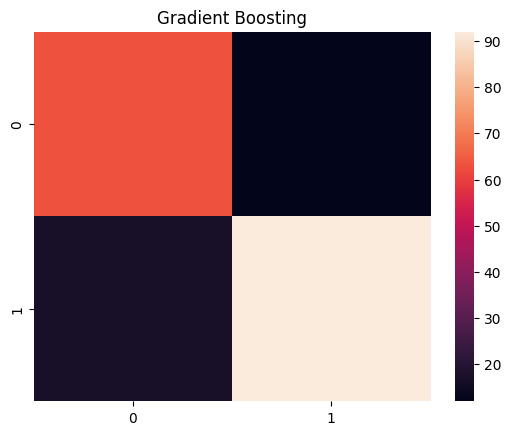

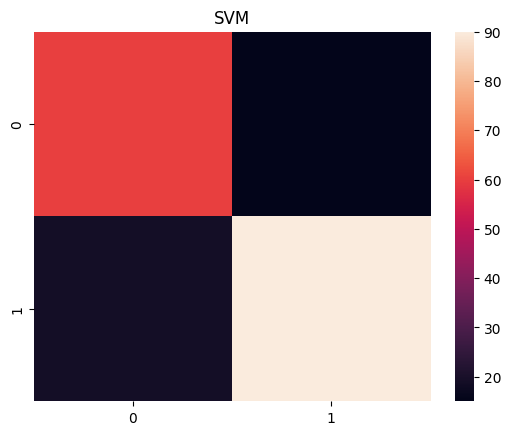

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

for i, name in enumerate(names):
    plt.figure()
    conf = confs[i]
    sns.heatmap(conf)
    plt.title(name)
plt.show()

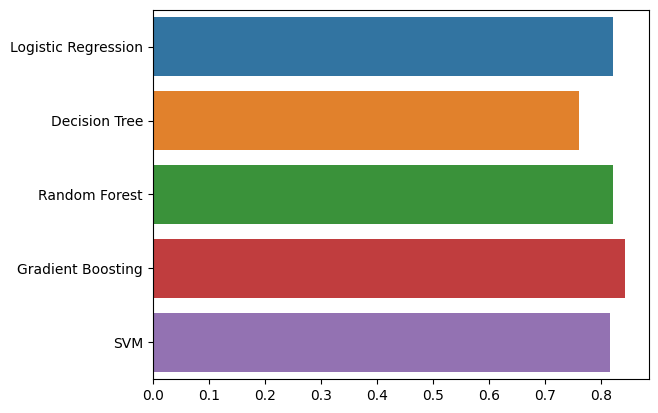

In [39]:
f = plt.figure()
sns.barplot(x=accuracies, y=names, hue=names)
plt.show()

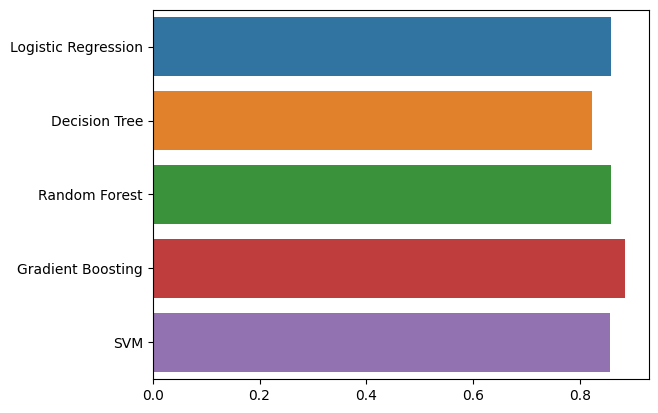

In [40]:
f = plt.figure()
sns.barplot(x=precisions, y=names, hue=names)
plt.show()

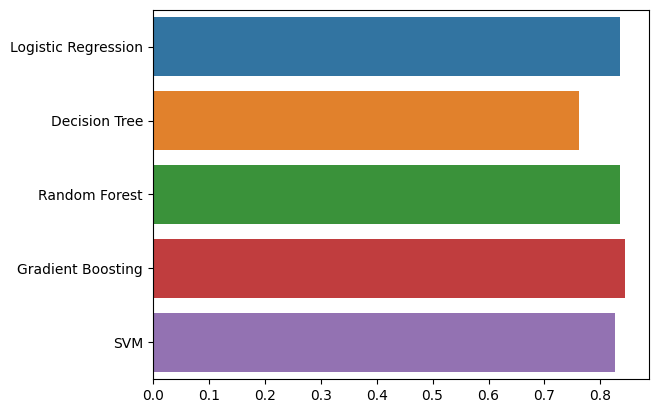

In [41]:
f = plt.figure()
sns.barplot(x=recalls, y=names, hue=names)
plt.show()

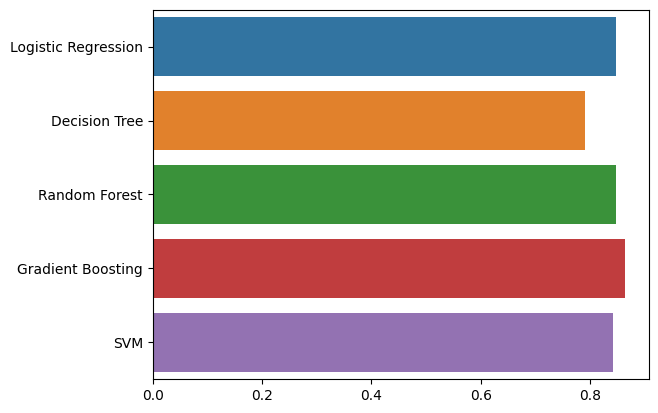

In [42]:
f = plt.figure()
sns.barplot(x=f1s, y=names, hue=names)
plt.show()

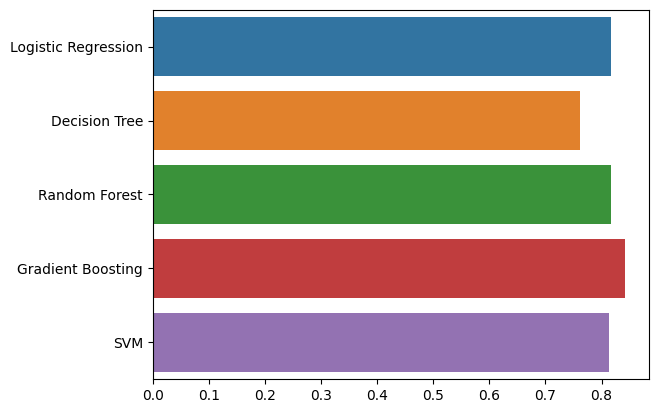

In [43]:
f = plt.figure()
sns.barplot(x=auc_rocs, y=names, hue=names)
plt.show()

#### Best Model
Gradient Boosting Classifier performed best, across the board

It gave best performance for all metrics